In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [37]:
df = pd.read_csv("winequality-red.csv")

X = df.drop("quality", axis=1)
y = df["quality"]

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("after SMOTE:")
print(y_res.value_counts())


after SMOTE:
quality
5    681
6    681
7    681
4    681
8    681
3    681
Name: count, dtype: int64


In [38]:

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_cat = to_categorical(y_train - y_train.min())
y_test_cat = to_categorical(y_test - y_test.min())

 


In [39]:
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation="softmax")   
])

model.compile(optimizer=Adam(learning_rate=0.0005), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

model.summary()


c:\Users\JHANANISHRI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,614 (174.27 KB)

 Trainable params: 44,614 (174.27 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
es = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    epochs=200,            
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)


Epoch 1/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3703 - loss: 1.5587 - val_accuracy: 0.4771 - val_loss: 1.2365
Epoch 2/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4870 - loss: 1.2351 - val_accuracy: 0.5703 - val_loss: 1.0285
Epoch 3/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5318 - loss: 1.1269 - val_accuracy: 0.6024 - val_loss: 0.9497
Epoch 4/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5685 - loss: 1.0453 - val_accuracy: 0.6330 - val_loss: 0.8873
Epoch 5/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5941 - loss: 1.0043 - val_accuracy: 0.6835 - val_loss: 0.8576
Epoch 6/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5949 - loss: 0.9652 - val_accuracy: 0.6972 - val_loss: 0.8059
Epoch 7/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6151 - loss: 0.9285 - val_accuracy: 0.6881 - val_loss: 0.7844
Epoch 8/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6354 - loss: 0.9144 - val_accuracy: 0.7049 - v

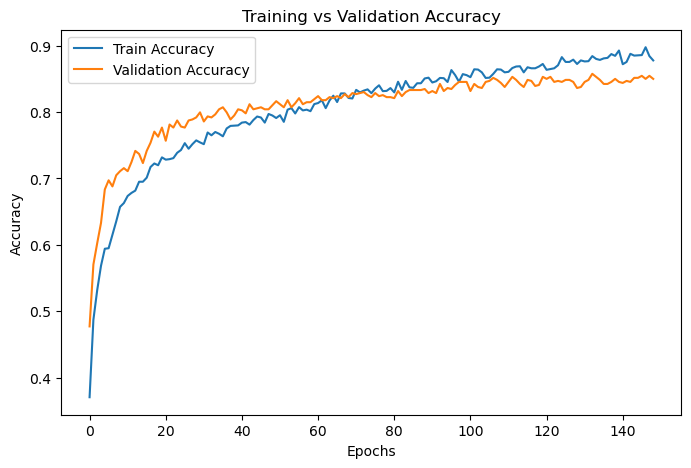

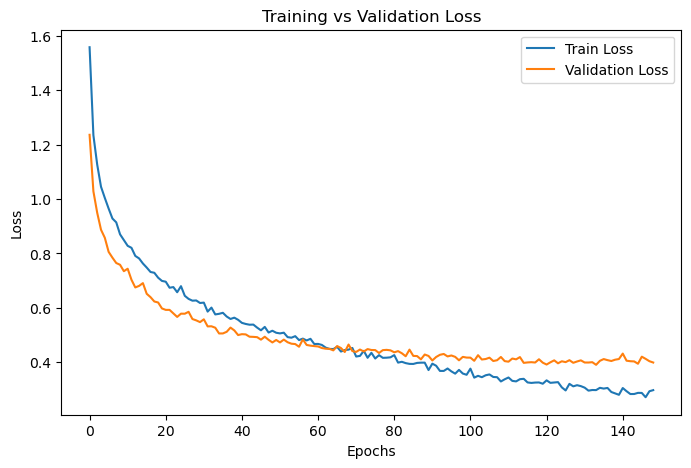

In [43]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()



In [44]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) + y_train.min()   

print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Precision:", precision_score(y_test, y_pred_classes, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_classes, average="weighted"))
print("F1:", f1_score(y_test, y_pred_classes, average="weighted"))

precision = precision_score(y_test, y_pred_classes, average=None, labels=np.unique(y_test))
recall = recall_score(y_test, y_pred_classes, average=None, labels=np.unique(y_test))

for idx, cls in enumerate(np.unique(y_test)):
    print(f"Class {cls}: Precision={precision[idx]:.3f}, Recall={recall[idx]:.3f}")



26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.8471882640586798
Precision: 0.8396975381998104
Recall: 0.8471882640586798
F1: 0.840301655535998
Class 3: Precision=0.971, Recall=1.000
Class 4: Precision=0.871, Recall=0.993
Class 5: Precision=0.764, Recall=0.618
Class 6: Precision=0.639, Recall=0.555
Class 7: Precision=0.803, Recall=0.920
Class 8: Precision=0.993, Recall=1.000
